# Annotation

Consider a binary classification problem. We will fit a predictor and use it to assign a weight score to each node in each instance; this operation is termed "annotation". We will display few annotated graphs as an example. We will see that building a predictor on the annotated instances can increase the predictive performance.

load data and convert it to graphs

In [1]:
filename = "tryptophan.sdf"

from eden.converter.molecule import obabel
iterable_mol = obabel.obabel_to_eden2(filename)

#split train/test
#train_test_split=0.9
#from eden.util import random_bipartition_iter
#iterable_pos_train, iterable_pos_test = random_bipartition_iter(iterable_pos, relative_size=train_test_split)
#iterable_neg_train, iterable_neg_test = random_bipartition_iter(iterable_neg, relative_size=train_test_split)

TypeError: obabel_to_eden2() takes no arguments (1 given)

setup the vectorizer

In [2]:
from eden.graph import Vectorizer
vectorizer = Vectorizer( complexity=4 )

In [3]:
%%time
from itertools import tee
iterable_pos_train,iterable_pos_train_=tee(iterable_pos_train)
iterable_neg_train,iterable_neg_train_=tee(iterable_neg_train)
iterable_pos_test,iterable_pos_test_=tee(iterable_pos_test)
iterable_neg_test,iterable_neg_test_=tee(iterable_neg_test)

from eden.util import fit,estimate
estimator = fit(iterable_pos_train_, iterable_neg_train_, vectorizer)
estimate(iterable_pos_test_, iterable_neg_test_, estimator, vectorizer)

Classifier:
SGDClassifier(alpha=2.65085243411e-05, class_weight='auto', epsilon=0.1,
       eta0=0.658058831687, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=85, n_jobs=1,
       penalty='elasticnet', power_t=0.207912851012, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Predictive performance:
            accuracy: 0.847 +- 0.015
           precision: 0.864 +- 0.023
              recall: 0.861 +- 0.028
                  f1: 0.863 +- 0.013
   average_precision: 0.924 +- 0.020
             roc_auc: 0.914 +- 0.014
--------------------------------------------------------------------------------
Test set
Instances: 435 ; Features: 1048577 with an avg of 308 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.8

annotate instances and list all resulting graphs

display one graph as an example. Color the vertices using the annotated 'weight' attribute.

/Library/Python/2.7/site-packages/pygraphviz/agraph.py:1281: RuntimeWarning: Fontconfig warning: ignoring UTF-8: not a valid region tag

  warnings.warn("".join(errors),RuntimeWarning)


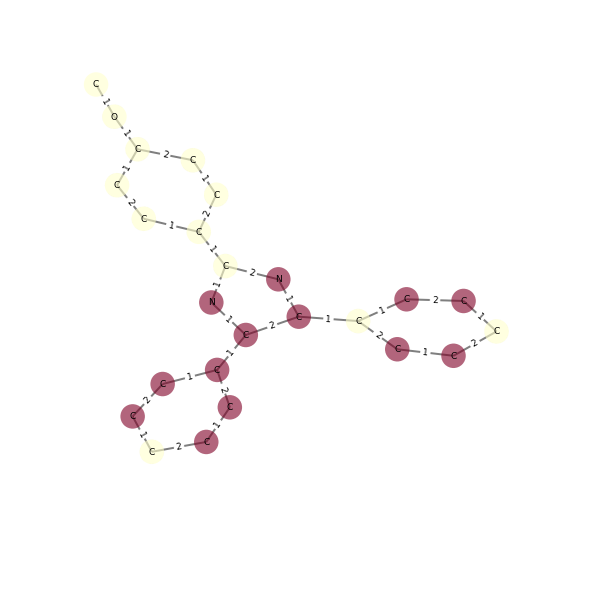

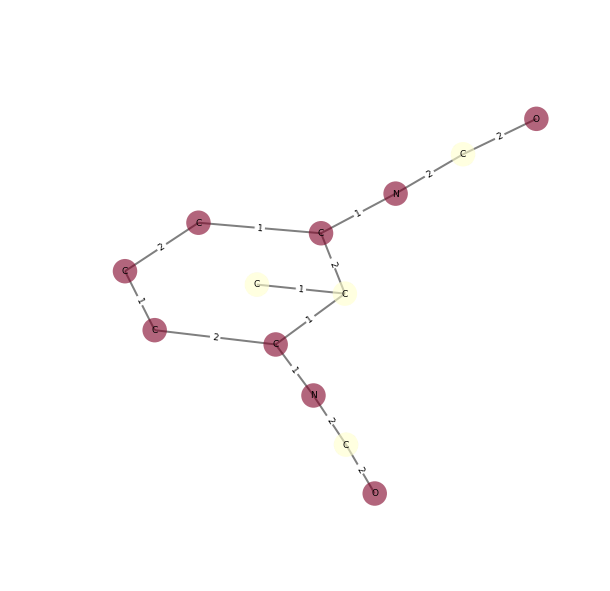

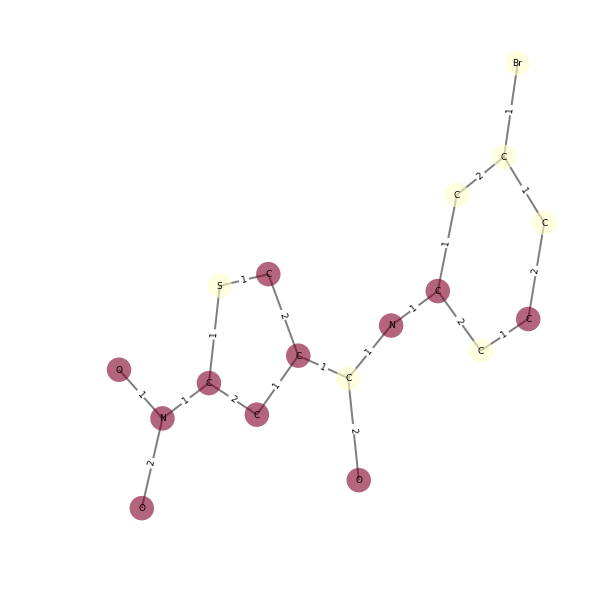

In [4]:
%matplotlib inline
from itertools import tee
iterable_pos_train,iterable_pos_train_=tee(iterable_pos_train)

graphs = vectorizer.annotate( iterable_pos_train_, estimator=estimator )

from eden.modifier.graph.vertex_attributes import colorize_binary
graphs = colorize_binary(graph_list = graphs, output_attribute = 'color_value', input_attribute='importance', level=0)

import itertools 
graphs = itertools.islice( graphs, 3 )

from eden.util.display import draw_graph
for graph in graphs: draw_graph( graph, vertex_color='color_value' )

Create a data matrix this time using the annotated graphs. Now graphs are weighted. 

evaluate the predictive performance on the weighted graphs.

In [5]:
%%time
num_iterations=10
for i in range(num_iterations):
    print 'Iteration %d'%i
    
    from itertools import tee
    iterable_pos_train_=vectorizer.annotate( iterable_pos_train, estimator=estimator )
    iterable_neg_train_=vectorizer.annotate( iterable_neg_train, estimator=estimator )
    iterable_pos_test_=vectorizer.annotate( iterable_pos_test, estimator=estimator )
    iterable_neg_test_=vectorizer.annotate( iterable_neg_test, estimator=estimator )
    
    iterable_pos_train,iterable_pos_train_=tee(iterable_pos_train_)
    iterable_neg_train,iterable_neg_train_=tee(iterable_neg_train_)
    iterable_pos_test,iterable_pos_test_=tee(iterable_pos_test_)
    iterable_neg_test,iterable_neg_test_=tee(iterable_neg_test_)

    from eden.util import fit,estimate
    estimator = fit(iterable_pos_train_, iterable_neg_train_, vectorizer)
    estimate(iterable_pos_test_, iterable_neg_test_, estimator, vectorizer)

Iteration 0
Classifier:
SGDClassifier(alpha=3.15136221984e-05, class_weight='auto', epsilon=0.1,
       eta0=0.31705177053, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=60, n_jobs=1,
       penalty='elasticnet', power_t=0.795171626564, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Predictive performance:
            accuracy: 0.945 +- 0.007
           precision: 0.954 +- 0.012
              recall: 0.947 +- 0.013
                  f1: 0.950 +- 0.007
   average_precision: 0.985 +- 0.004
             roc_auc: 0.981 +- 0.005
--------------------------------------------------------------------------------
Test set
Instances: 435 ; Features: 1048577 with an avg of 308 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -